# Random Forest



## Exercises

In [1]:
#Tabular data imports:
import pandas as pd
import numpy as np

#Visualization imports:
import matplotlib.pyplot as plt

#Imports we need for assessing the performance of our model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


#Importing the functions for getting, splitting, and preping the data:
import acquire
import prepare
import model

### Use Titanic data 

## Acquire & Prepare data

In [2]:
# Acquire and prepare data 
titanic = prepare.clean_titanic(acquire.get_titanic_data())
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


Prepare for modeling

In [3]:
titanic = model.preprocess_titanic(titanic)

## Train, validate, split data

In [4]:
train, validate, test = prepare.split_data(titanic, 'survived')

train: 534 (60.0% of 891)
validate: 178 (20.0% of 891)
test: 179 (20.0% of 891)


In [5]:
# Counts for target value: survived
train.survived.value_counts()

survived
0    329
1    205
Name: count, dtype: int64

### Isolate the tagret variable

In [6]:
# Defining X and y for train, validate and test
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = validate.drop(columns='survived')
y_val = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [7]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
776,3,0,0,7.7500,1,1,1,0
829,1,0,0,80.0000,1,0,0,1
215,1,1,0,113.2750,0,0,0,0
258,1,0,0,512.3292,1,0,0,0
129,3,0,0,6.9750,1,1,0,1


### Create the baseline

In [8]:
#Baseline prediction for a classification problem is predicting the most prevelant class(the mode)

baseline = y_train.mode()
baseline_accuracy = y_train == 0
print(f"Baseline prediction: {(baseline[0])}")
print(f"Baseline accuracy: {(baseline_accuracy.mean())}")

Baseline prediction: 0
Baseline accuracy: 0.6161048689138576


### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [9]:
#create the model
forest1 = RandomForestClassifier(min_samples_leaf= 1, max_depth=10, random_state=42)
forest1

RandomForestClassifier(max_depth=10, random_state=42)

In [10]:
#fit the model

forest1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [11]:
#get the predictions
y_predictions = forest1.predict(X_train)
y_predictions

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [12]:
def get_metrics(model,xtrain,ytrain,xtest,ytest):
    
    labels = sorted(y_train.unique())
    
    # OUTPUTS AN ARRAY OF PREDICTIONS
    preds = model.predict(xtest)
    print("Accuracy Score:", model.score(xtest,ytest))
    print()
    print('Confusion Matrix:')
    conf = confusion_matrix(ytest,preds)
    conf = pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])
    print(conf)
    print()
    print("Classification Report:")
    print(classification_report(ytest, preds))


In [13]:
get_metrics(forest1,X_train,y_train,X_test,y_test)


Accuracy Score: 0.7821229050279329

Confusion Matrix:
          0_predict  1_predict
0_actual         91         19
1_actual         20         49

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       110
           1       0.72      0.71      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [14]:
# OR

In [15]:
#get accuracy score for first model
forest1.score(X_train, y_train)

0.9456928838951311

In [16]:
conf = confusion_matrix(y_train, y_predictions)
conf

array([[324,   5],
       [ 24, 181]])

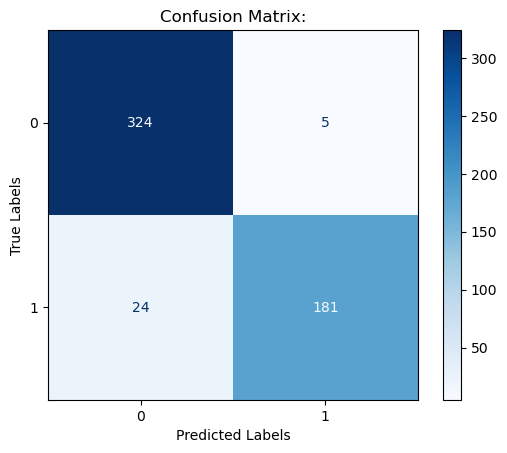

In [17]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import matplotlib.pyplot as plt

# y_train contains the true labels and y_predictions contains the predicted labels
cm = confusion_matrix(y_train, y_predictions)
display_labels = ['0', '1']  

# Create a ConfusionMatrixDisplay object
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=forest1.classes_)

# Set the colormap and plot the confusion matrix
confusion_matrix_display.plot(cmap=plt.cm.Blues)  

# Add title and axis labels
plt.title("Confusion Matrix:")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

In [18]:
report = classification_report(y_train, y_predictions, output_dict=True)

print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.931034,0.973118,0.945693,0.952076,0.947190
recall,0.984802,0.882927,0.945693,0.933865,0.945693
f1-score,0.957164,0.925831,0.945693,0.941498,0.945135
support,329.000000,205.000000,0.945693,534.000000,534.000000


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [19]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [20]:
#another way
confu = confusion_matrix(y_train,forest1.predict(X_train))
TN = confu[0][0]
FP = confu[0][1]
FN = confu[1][0]
TP = confu[1][1]

In [21]:
confu

array([[324,   5],
       [ 24, 181]])

In [22]:
TN

324

In [23]:
compute_metrics(TN,FP,FN,TP)

Accuracy: 0.9456928838951311

True Positive Rate/Sensitivity/Recall/Power: 0.8829268292682927
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.11707317073170732

Precision/PPV: 0.9731182795698925
F1 Score: 0.9258312020460359

Support (0): 205
Support (1): 329


In [24]:
# OR

In [25]:
# .ravel returns a contigious array
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(324, 5, 24, 181)

In [26]:
# Accuracy
all = TP + FP + FN + TN
acc = (TP + TN) / all
print(f"Accuracy: {round(acc*100, 2)}")

# True positive rate, also recall
TPR = recall = TP/ (TP + FN)
print(f"True Positive Rate: {round(TPR*100, 2)}")

# false positive rate
FPR = FP / (FP + TN)
print(f"False Positive Rate: {round(FPR*100, 2)}")

# true negative rate
TNR = TN / (TN + FP)
print(f"True Negative Rate: {round(TNR*100, 2)}")

# false negative rate
FNR = FN / (FN + TP)
print(f"False Negative Rate: {round(FNR*100, 2)}")

# precision
precision = TP / (TP + FP)
print(f"Precision: {round(precision*100, 2)}")

# f1
f1_score = 2 * (precision*recall) / (precision+recall)
print(f"F1 score: {round(f1_score*100, 2)}")

# support
support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 94.57
True Positive Rate: 88.29
False Positive Rate: 1.52
True Negative Rate: 98.48
False Negative Rate: 11.71
Precision: 97.31
F1 score: 92.58
Support (0): 205
Support (1): 329


### 4.Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [27]:
scores_all = []

for x in range(1,11):
    
    # looping through min_samples_leaf front to back 
    # looping through max_depth back to front
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x) # different if x = 10 vs x = 1
    #fit it
    rf.fit(X_train, y_train)
    #transform it
    train_acc = rf.score(X_train, y_train)
    
    #evaluate on my validate data
    val_acc = rf.score(X_val, y_val)
    
    print(f'min_samples_leaf = {x} max_depth = {11-x}, accuracy = {train_acc, val_acc}')
    
    scores_all.append([x, 11-x, train_acc, val_acc])

min_samples_leaf = 1 max_depth = 10, accuracy = (0.9456928838951311, 0.7808988764044944)
min_samples_leaf = 2 max_depth = 9, accuracy = (0.898876404494382, 0.7471910112359551)
min_samples_leaf = 3 max_depth = 8, accuracy = (0.8707865168539326, 0.7415730337078652)
min_samples_leaf = 4 max_depth = 7, accuracy = (0.8595505617977528, 0.7415730337078652)
min_samples_leaf = 5 max_depth = 6, accuracy = (0.848314606741573, 0.7191011235955056)
min_samples_leaf = 6 max_depth = 5, accuracy = (0.8445692883895131, 0.7528089887640449)
min_samples_leaf = 7 max_depth = 4, accuracy = (0.8333333333333334, 0.7415730337078652)
min_samples_leaf = 8 max_depth = 3, accuracy = (0.8202247191011236, 0.7415730337078652)
min_samples_leaf = 9 max_depth = 2, accuracy = (0.7883895131086143, 0.7471910112359551)
min_samples_leaf = 10 max_depth = 1, accuracy = (0.7752808988764045, 0.7134831460674157)


In [28]:
scores_all

[[1, 10, 0.9456928838951311, 0.7808988764044944],
 [2, 9, 0.898876404494382, 0.7471910112359551],
 [3, 8, 0.8707865168539326, 0.7415730337078652],
 [4, 7, 0.8595505617977528, 0.7415730337078652],
 [5, 6, 0.848314606741573, 0.7191011235955056],
 [6, 5, 0.8445692883895131, 0.7528089887640449],
 [7, 4, 0.8333333333333334, 0.7415730337078652],
 [8, 3, 0.8202247191011236, 0.7415730337078652],
 [9, 2, 0.7883895131086143, 0.7471910112359551],
 [10, 1, 0.7752808988764045, 0.7134831460674157]]

In [29]:
scores_df = pd.DataFrame(scores_all, columns =['min_samples_leaf','max_depth','train_acc','val_acc'])
scores_df

,min_samples_leaf,max_depth,train_acc,val_acc
0,1,10,0.945693,0.780899
1,2,9,0.898876,0.747191
2,3,8,0.870787,0.741573
3,4,7,0.859551,0.741573
4,5,6,0.848315,0.719101
5,6,5,0.844569,0.752809
6,7,4,0.833333,0.741573
7,8,3,0.820225,0.741573
8,9,2,0.788390,0.747191
9,10,1,0.775281,0.713483


In [30]:
# for-loop through so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    #creating the model
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.898876,0.747191,0.151685
1,3,17,0.865169,0.735955,0.129213
2,4,16,0.861423,0.752809,0.108614
3,5,15,0.853933,0.741573,0.112360
4,6,14,0.837079,0.752809,0.084270
5,7,13,0.840824,0.752809,0.088015
6,8,12,0.831461,0.730337,0.101124
7,9,11,0.838951,0.752809,0.086142
8,10,10,0.833333,0.735955,0.097378
9,11,9,0.835206,0.735955,0.099251


### 5.What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [31]:
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc
scores_df.sort_values('difference', ascending=True)

,min_samples_leaf,max_depth,train_acc,val_acc,difference
8,9,2,0.788390,0.747191,0.041199
9,10,1,0.775281,0.713483,0.061798
7,8,3,0.820225,0.741573,0.078652
5,6,5,0.844569,0.752809,0.091760
6,7,4,0.833333,0.741573,0.091760
3,4,7,0.859551,0.741573,0.117978
2,3,8,0.870787,0.741573,0.129213
4,5,6,0.848315,0.719101,0.129213
1,2,9,0.898876,0.747191,0.151685
0,1,10,0.945693,0.780899,0.164794


In [32]:
# OR

In [33]:
#only using max_depth evaluation matrices
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.799625,0.769663,0.029963
1,3,0.816479,0.764045,0.052434
2,4,0.838951,0.758427,0.080524
3,5,0.868914,0.747191,0.121723
4,6,0.897004,0.752809,0.144195
5,7,0.906367,0.769663,0.136704
6,8,0.926966,0.769663,0.157303
7,9,0.941948,0.775281,0.166667
8,10,0.945693,0.780899,0.164794
9,11,0.947566,0.780899,0.166667


### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

min_samples_leaf approximately 8 and max-depth approximately 8 performs the best for close metrics


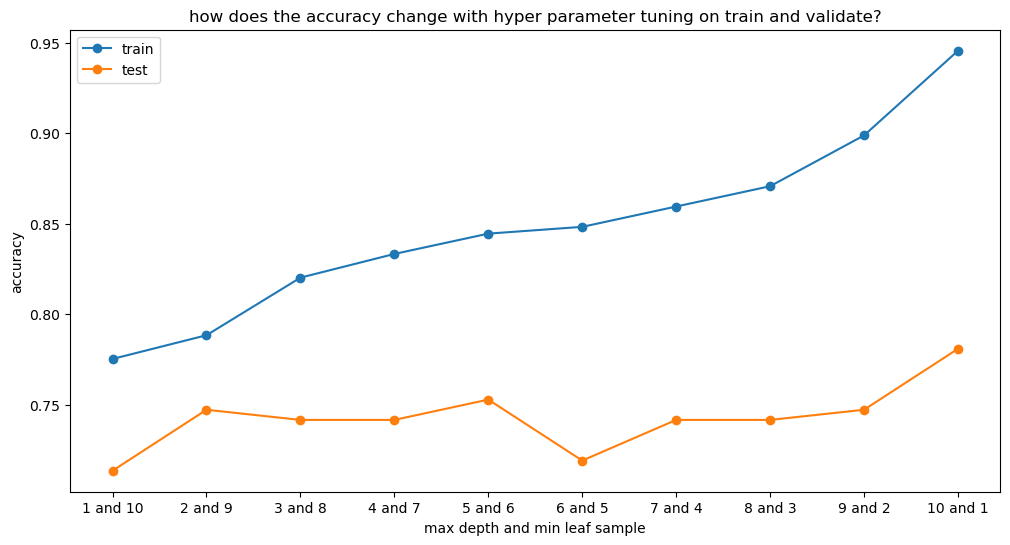

In [34]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='test', marker='o')
plt.xlabel('max depth and min leaf sample')
plt.ylabel('accuracy')

plt.xticks([1,2,3,4,5,6,7,8,9,10],
          [('1 and 10'),('2 and 9'),('3 and 8'),('4 and 7'),('5 and 6'),
          ('6 and 5'),('7 and 4'), ('8 and 3'), ('9 and 2'), ('10 and 1') ]
          )

plt.title('how does the accuracy change with hyper parameter tuning on train and validate?')
plt.legend()
plt.show()

In [35]:
# charts can be misleading, sometimes better to look at a dataframe
scores_df.sort_values('difference')

,min_samples_leaf,max_depth,train_acc,val_acc,difference
8,9,2,0.788390,0.747191,0.041199
9,10,1,0.775281,0.713483,0.061798
7,8,3,0.820225,0.741573,0.078652
5,6,5,0.844569,0.752809,0.091760
6,7,4,0.833333,0.741573,0.091760
3,4,7,0.859551,0.741573,0.117978
2,3,8,0.870787,0.741573,0.129213
4,5,6,0.848315,0.719101,0.129213
1,2,9,0.898876,0.747191,0.151685
0,1,10,0.945693,0.780899,0.164794


The optimal model had a Max_depth of 1 and min_samples_leaf of 10. This performs best on our in sample data because it has the smallest amount of drop off between its train and test set so were achieving the most balance with this model:

Although we get high validation accuracy for index 2 & 1 they also have a large amoutn of variance between these models


Train Acc: 78.1%


Test Acc: 76.1%

In [36]:
# OR

In [37]:
#decreasing min samples leaf and increasing max depth
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = max_depth + i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,22,2,0.786517,0.741573,0.044944
1,23,3,0.816479,0.735955,0.080524
2,24,4,0.790262,0.719101,0.071161
3,25,5,0.794007,0.730337,0.063670
4,26,6,0.812734,0.713483,0.099251
5,27,7,0.794007,0.713483,0.080524
6,28,8,0.790262,0.724719,0.065543
7,29,9,0.794007,0.713483,0.080524
8,30,10,0.794007,0.713483,0.080524
9,31,11,0.788390,0.730337,0.058052


In [38]:
#increasing both min sample leaf and max depth
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.782772,0.741573,0.041199
1,3,3,0.833333,0.747191,0.086142
2,4,4,0.833333,0.747191,0.086142
3,5,5,0.848315,0.752809,0.095506
4,6,6,0.835206,0.730337,0.104869
5,7,7,0.842697,0.730337,0.112360
6,8,8,0.829588,0.752809,0.076779
7,9,9,0.829588,0.741573,0.088015
8,10,10,0.829588,0.752809,0.076779
9,11,11,0.833333,0.747191,0.086142


In [39]:
#fixed max depth and increasing min samples leaf
metrics = []


for i in range(2, 25):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.878277,0.735955,0.142322
1,3,6,0.857678,0.735955,0.121723
2,4,6,0.859551,0.735955,0.123596
3,5,6,0.848315,0.719101,0.129213
4,6,6,0.835206,0.730337,0.104869
5,7,6,0.837079,0.735955,0.101124
6,8,6,0.833333,0.752809,0.080524
7,9,6,0.829588,0.741573,0.088015
8,10,6,0.831461,0.747191,0.084270
9,11,6,0.829588,0.747191,0.082397
